In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score ,classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading in the file

breast_df = pd.read_csv("/content/drive/MyDrive/Datasets/data.csv")
breast_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#row1 = [842302.000000, 17.990000, 10.380000, 122.800000, 1001.000000, 0.118400, 0.277600, 0.300100, 0.147100, 0.241900, 0.078710, 1.095000, 0.905300, 8.589000, 153.400000, 0.006399, 0.049040, 0.053730, 0.015870, 0.030030
#0.006193, 25.380000, 17.330000, 184.600000, 2019.000000, 0.162200, 0.665600, 0.711900, 0.265400, 0.460100, 0.118900]

In [4]:
#row1 = breast_df.iloc[0]

## Exploratory Data Analysis

In [5]:
breast_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:

breast_df.shape

(569, 33)

In [7]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
breast_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
breast_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [10]:
breast_df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [11]:
if "Unnamed: 32" in breast_df.columns:
    breast_df.drop("Unnamed: 32", axis=1, inplace=True)

breast_df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
if "id" in breast_df.columns:
    breast_df.drop("id", axis=1, inplace=True)

breast_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
breast_df.reset_index(drop=True, inplace=True)
breast_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
breast_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
breast_df.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [16]:
breast_df.duplicated().sum()

np.int64(0)

In [17]:
breast_df["diagnosis"] = breast_df["diagnosis"].map({"M":1,"B":0})
breast_df["diagnosis"].value_counts()


,count
diagnosis,
0,357
1,212


In [18]:
breast_df["diagnosis"].value_counts(normalize = True) * 100

,proportion
diagnosis,
0,62.741652
1,37.258348


### Visualisations

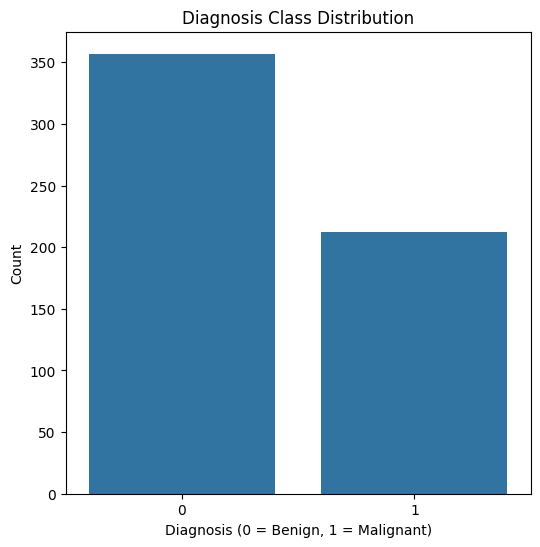

In [19]:
# class distribution plot
plt.figure(figsize=(6, 6))
sns.countplot(x="diagnosis", data=breast_df)
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.show()

Insight

Benign cases are more frequent than malignant. This means the dataset is slightly imbalanced but not heavily.

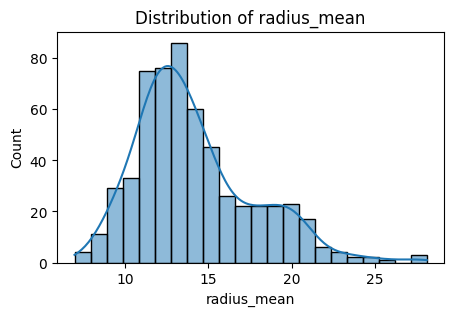

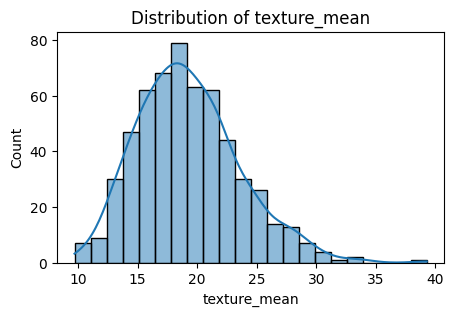

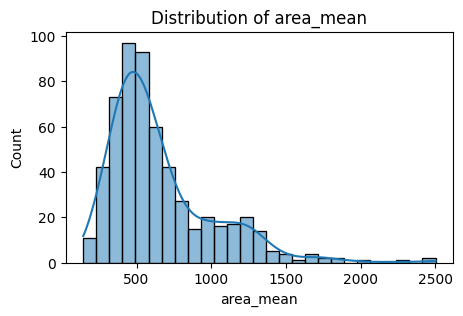

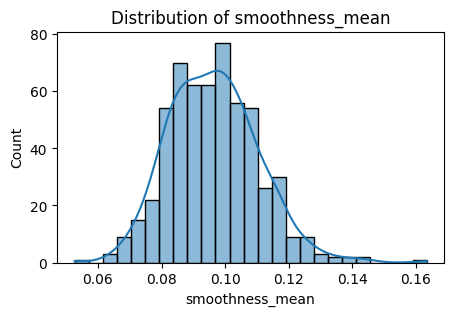

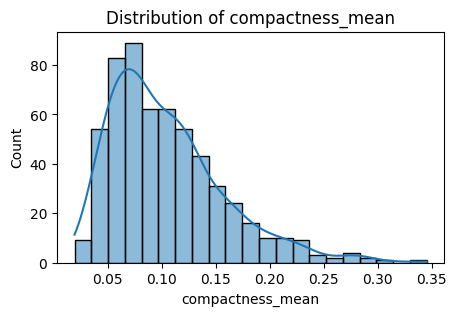

In [20]:
numeric_cols = ["radius_mean","texture_mean","area_mean","smoothness_mean","compactness_mean"]

for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(breast_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


The positive skewness shows that most tumors have smaller measurements, with few large values mainly coming from malignant cases.

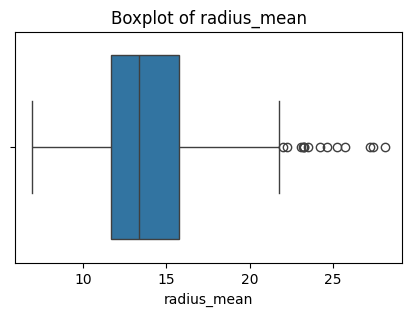

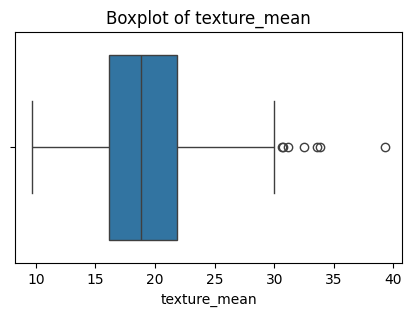

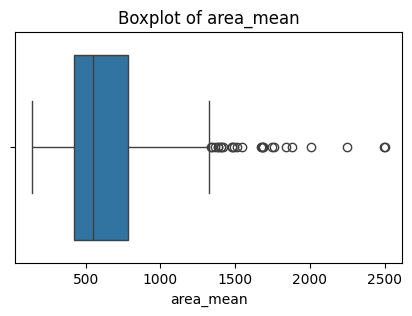

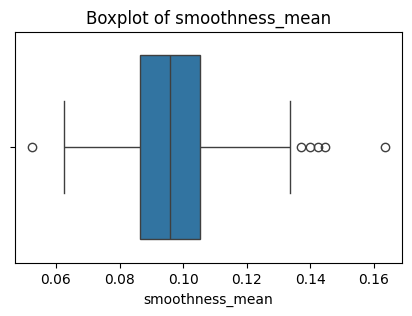

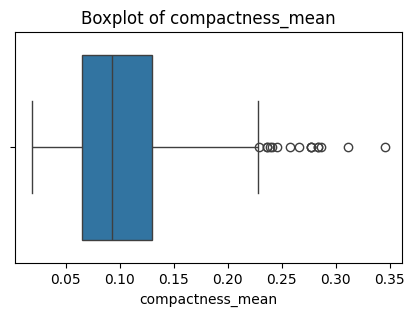

In [21]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=breast_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


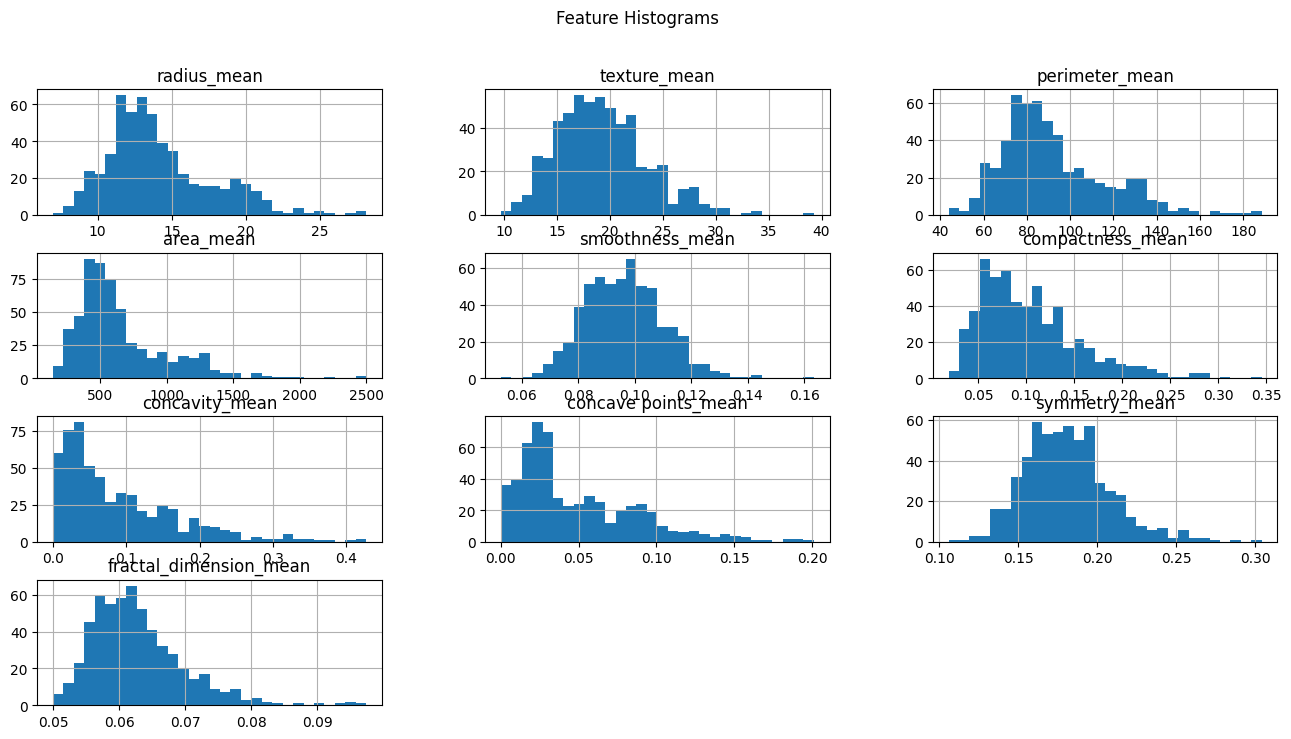

In [22]:
numeric_features = breast_df.columns[1:11]
breast_df[numeric_features].hist(figsize=(16, 8), bins = 30)
plt.suptitle("Feature Histograms")
plt.show()

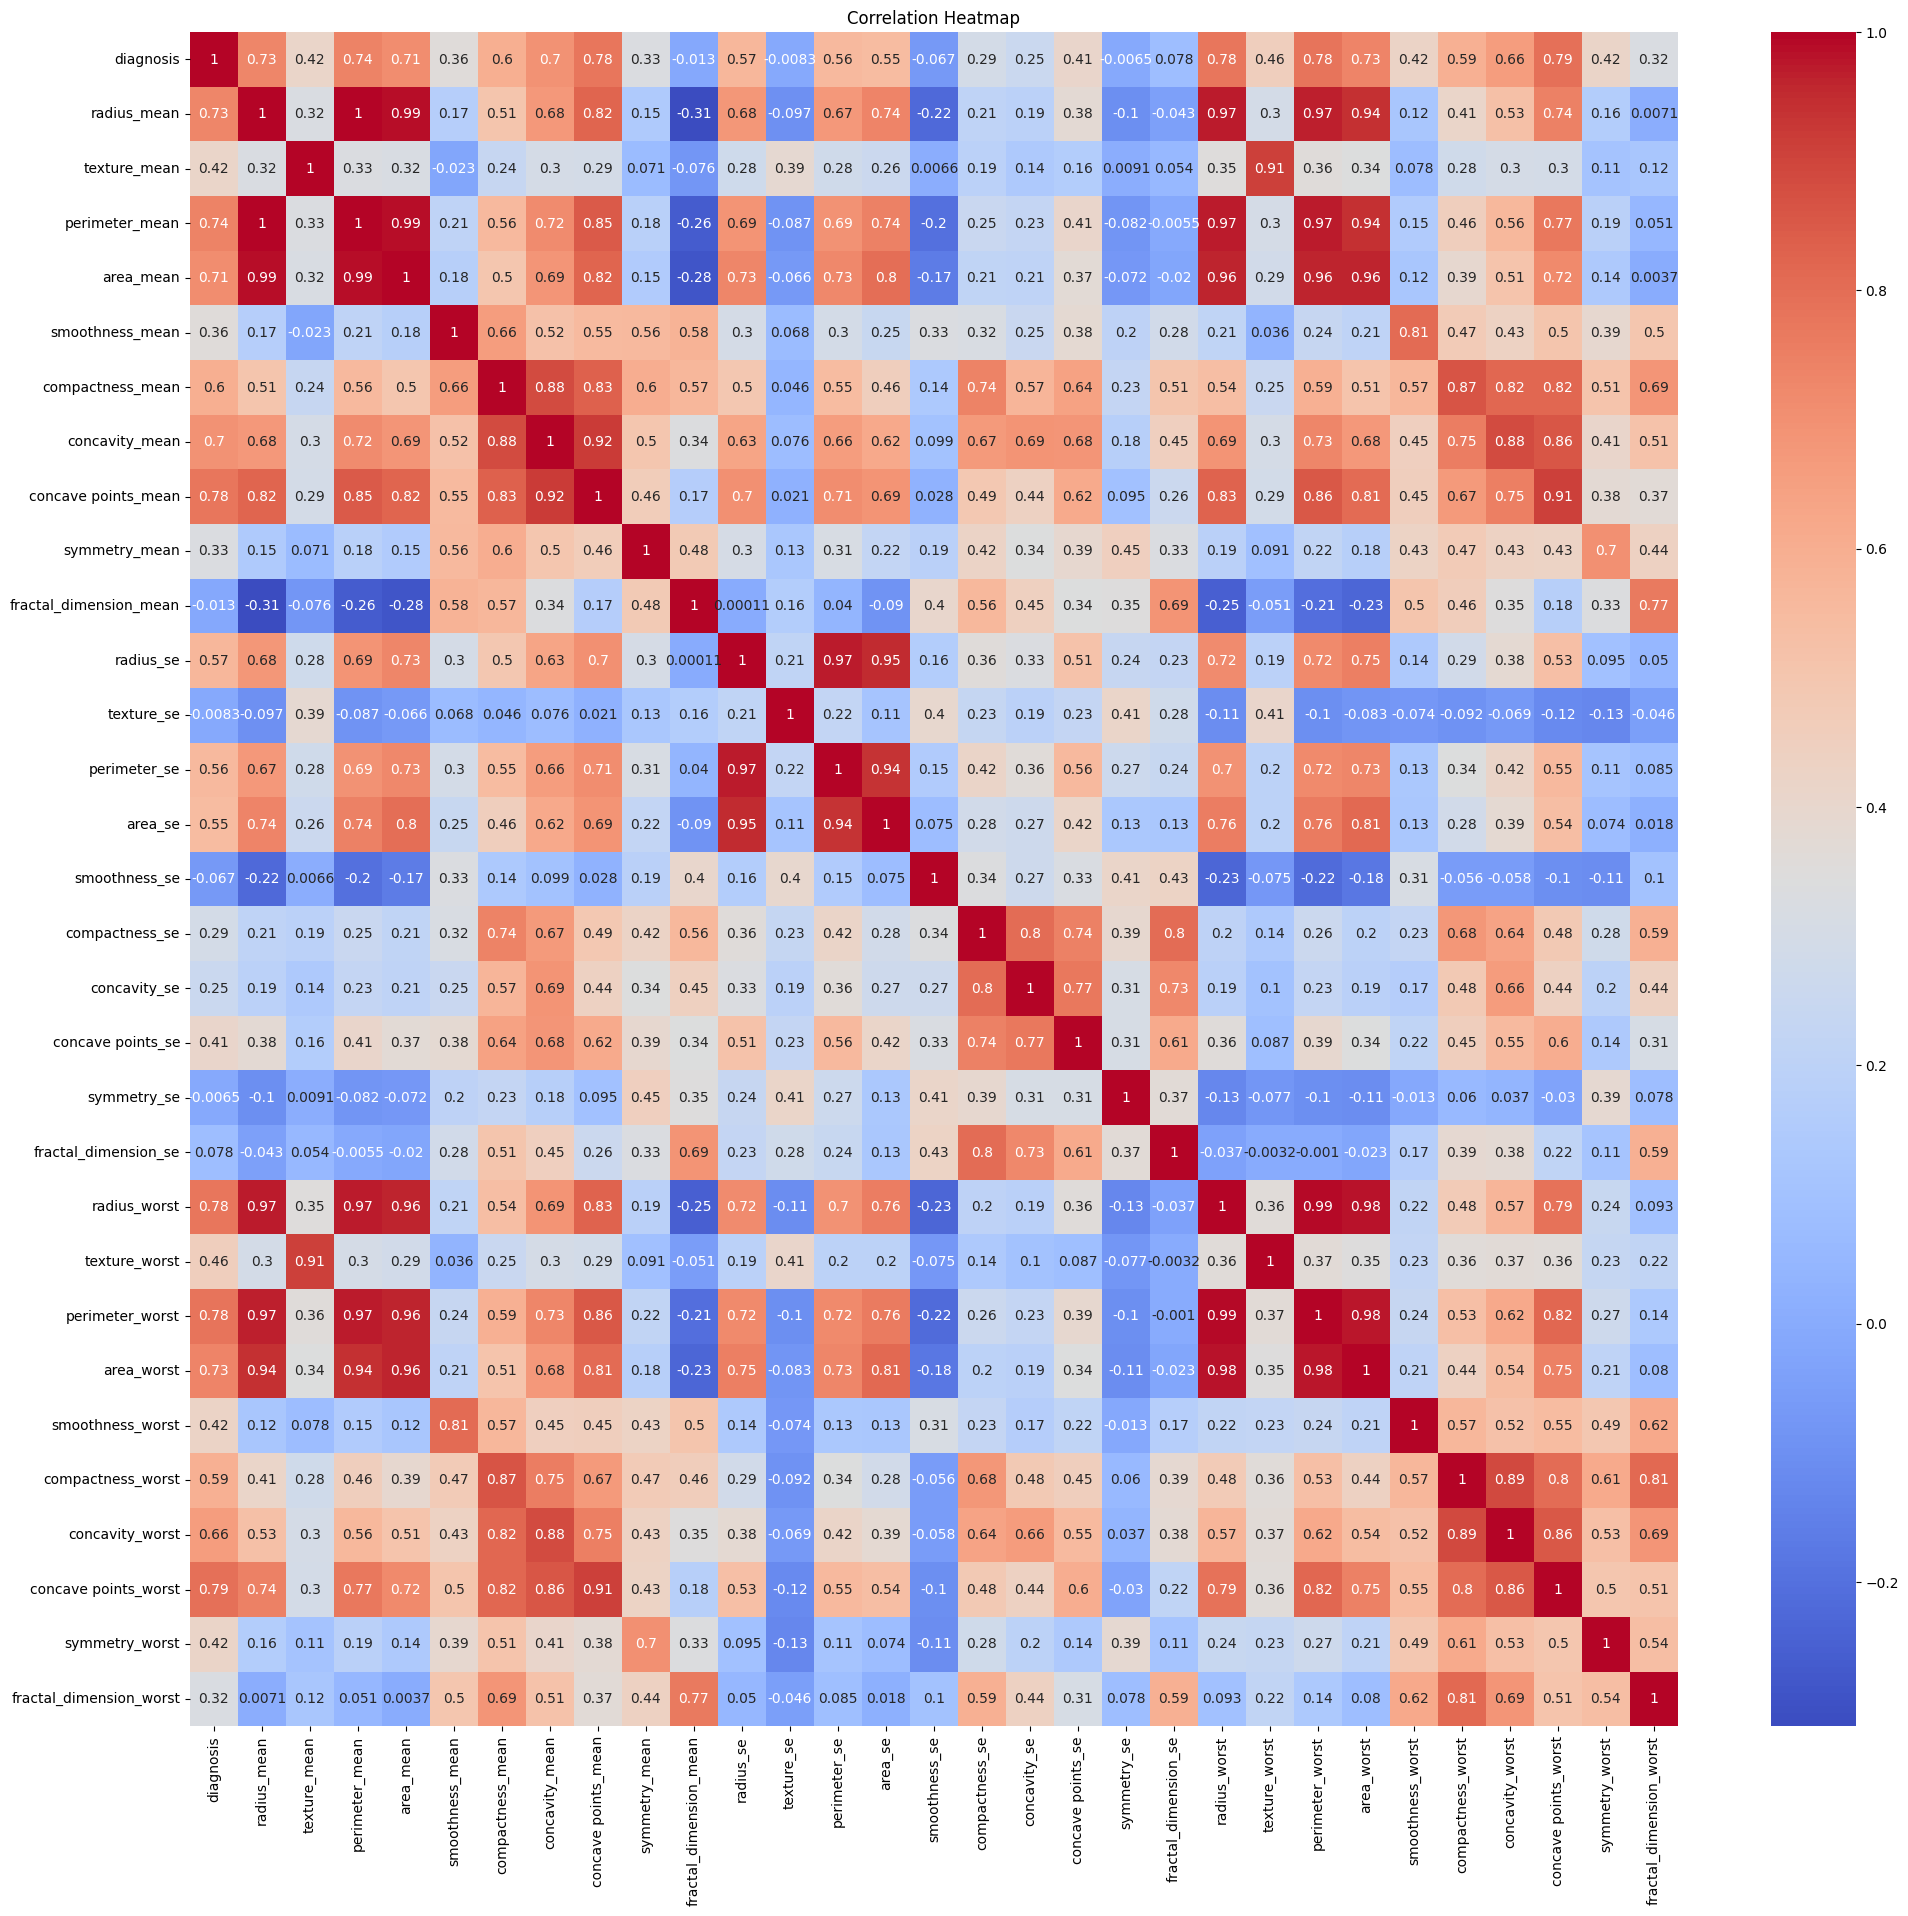

In [23]:
plt.figure(figsize=(24,22))
sns.heatmap(breast_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Top most correlated features

In [24]:
corr = breast_df.corr()['diagnosis'].abs().sort_values(ascending=False)
corr.head(15)


,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


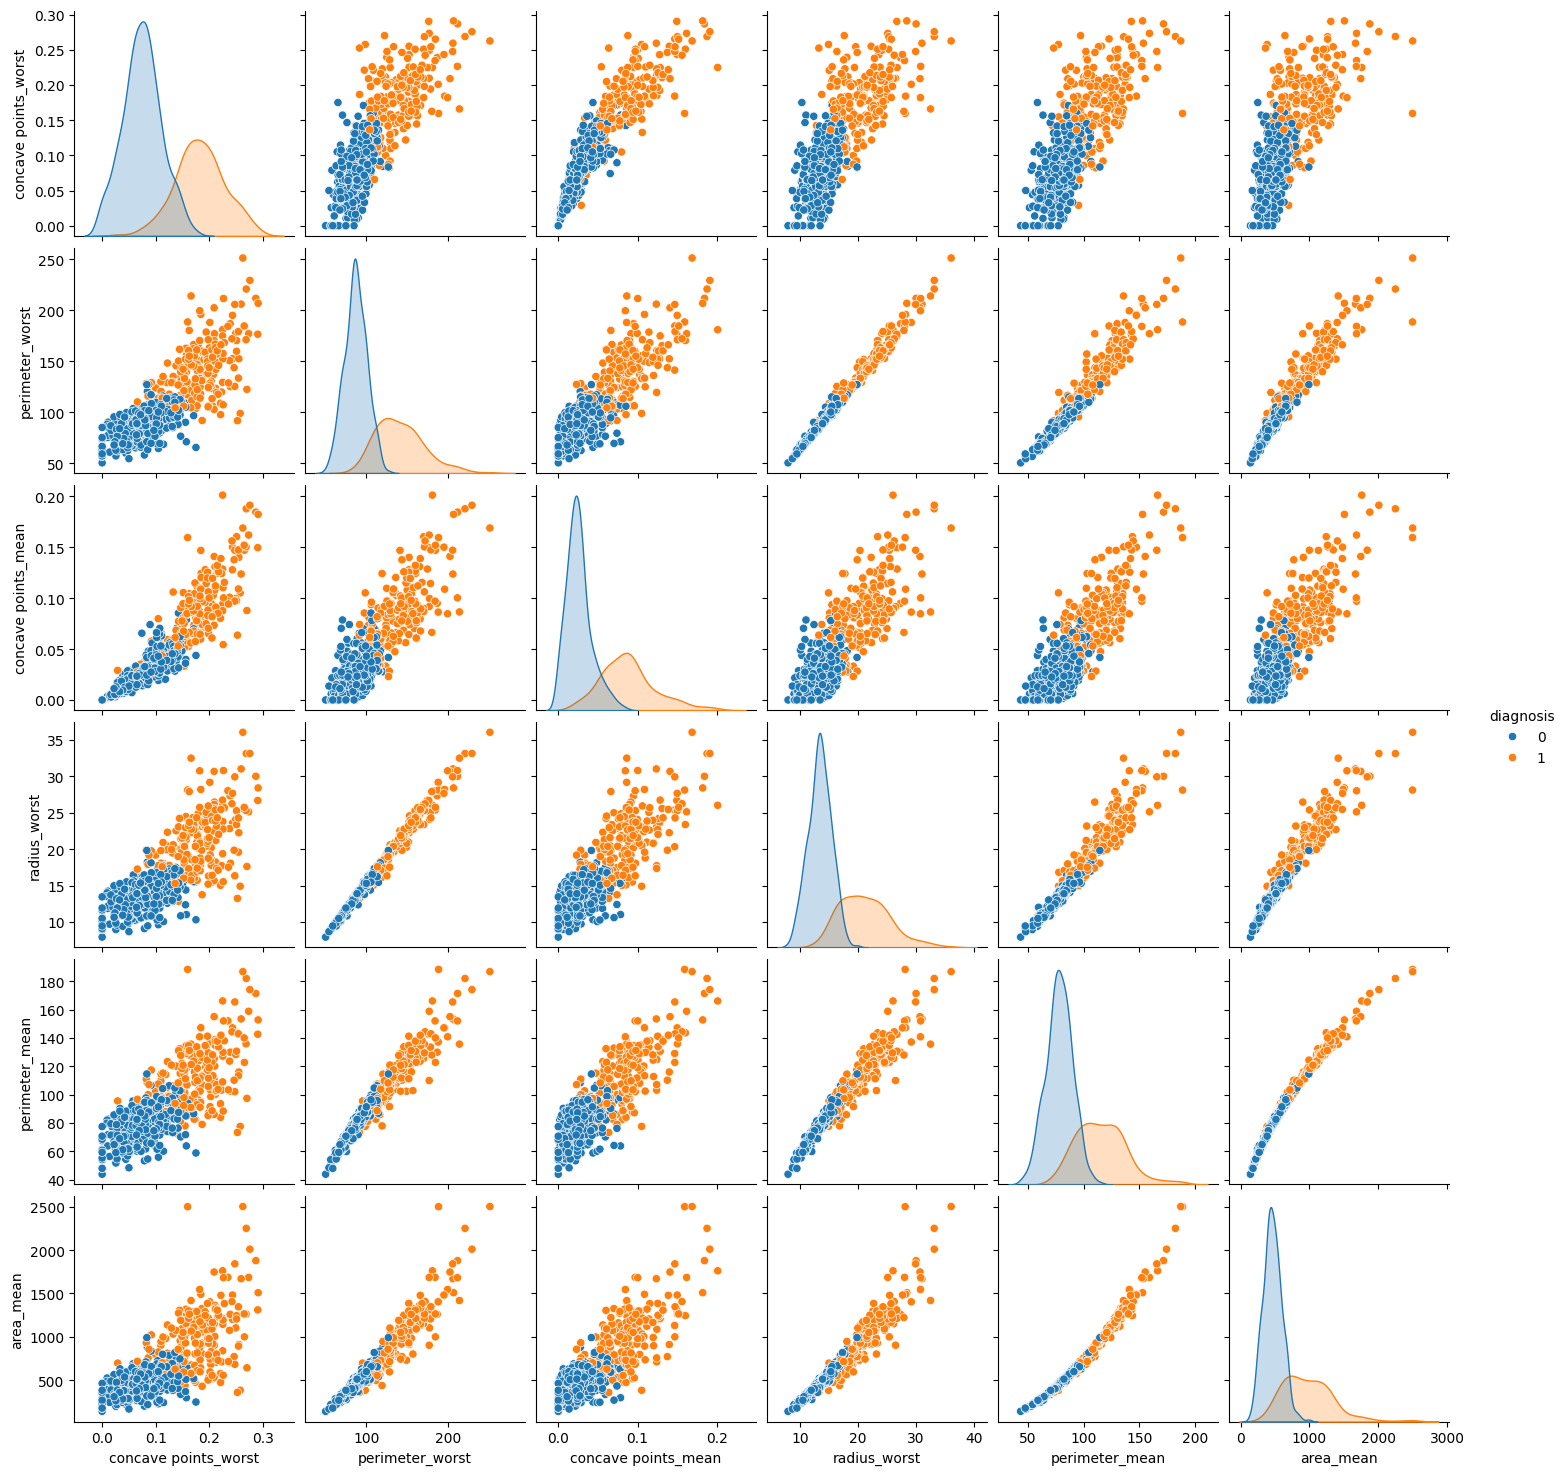

In [47]:
sns.pairplot(
    breast_df[["diagnosis","concave points_worst","perimeter_worst","concave points_mean","radius_worst","perimeter_mean","area_mean"]],
    hue="diagnosis"
)


These pair plots show that malignant tumors tend to be larger and more irregular than benign tumors. There are strong correlations between size-related features and clear clustering by diagnosis confirms that these variables are effective for prediction.

### Split features and target data

In [26]:
X = breast_df.drop('diagnosis', axis=1)
y = breast_df['diagnosis']


Split train and test data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Scale the data

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

Logistic Regression

In [29]:
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr =log_reg.predict(X_test_scaled)

Support Vector Machine

In [30]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

Random Forest

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

K-Nearest Neighbours

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

### Evaluating the models

In [33]:
train_score = []
test_score = []
rec_score = []
f_score = []
model_names = []

def evaluate(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_train = model.score(X_train, y_train) * 100
    accuracy_test = accuracy_score(y_test, y_pred) * 100
    recall_result = recall_score(y_test, y_pred) * 100
    f1_result = f1_score(y_test, y_pred) * 100

    train_score.append(accuracy_train)
    test_score.append(accuracy_test)
    rec_score.append(recall_result)
    f_score.append(f1_result)
    model_names.append(name)

    print(f"{name}")
    print("Train Accuracy:",accuracy_train)
    print("Test Accracy :",accuracy_test)
    print("Recall score is :",recall_result)
    print("F1 score is :",f1_result)

In [34]:
evaluate(log_reg, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")

Logistic Regression
Train Accuracy: 98.68131868131869
Test Accracy : 97.36842105263158
Recall score is : 95.34883720930233
F1 score is : 96.47058823529412


In [35]:
evaluate(svm, X_train_scaled, X_test_scaled, y_train, y_test, "Support Vector Machine")

Support Vector Machine
Train Accuracy: 98.9010989010989
Test Accracy : 98.24561403508771
Recall score is : 95.34883720930233
F1 score is : 97.61904761904762


In [36]:
evaluate(rf, X_train, X_test, y_train, y_test, "Random Forest")

Random Forest
Train Accuracy: 100.0
Test Accracy : 96.49122807017544
Recall score is : 93.02325581395348
F1 score is : 95.23809523809523


In [37]:
evaluate(knn, X_train_scaled, X_test_scaled, y_train, y_test, "K-Nearest Neighbors")

K-Nearest Neighbors
Train Accuracy: 98.02197802197801
Test Accracy : 94.73684210526315
Recall score is : 93.02325581395348
F1 score is : 93.02325581395348


### Comparing the models

In [38]:
results = pd.DataFrame({
    "Model": model_names,
    "Train Accuracy": train_score,
    "Test Accuracy": test_score,
    "Recall": rec_score,
    "F1 Score": f_score
})

results

,Model,Train Accuracy,Test Accuracy,Recall,F1 Score
0,Logistic Regression,98.681319,97.368421,95.348837,96.470588
1,Support Vector Machine,98.901099,98.245614,95.348837,97.619048
2,Random Forest,100.000000,96.491228,93.023256,95.238095
3,K-Nearest Neighbors,98.021978,94.736842,93.023256,93.023256


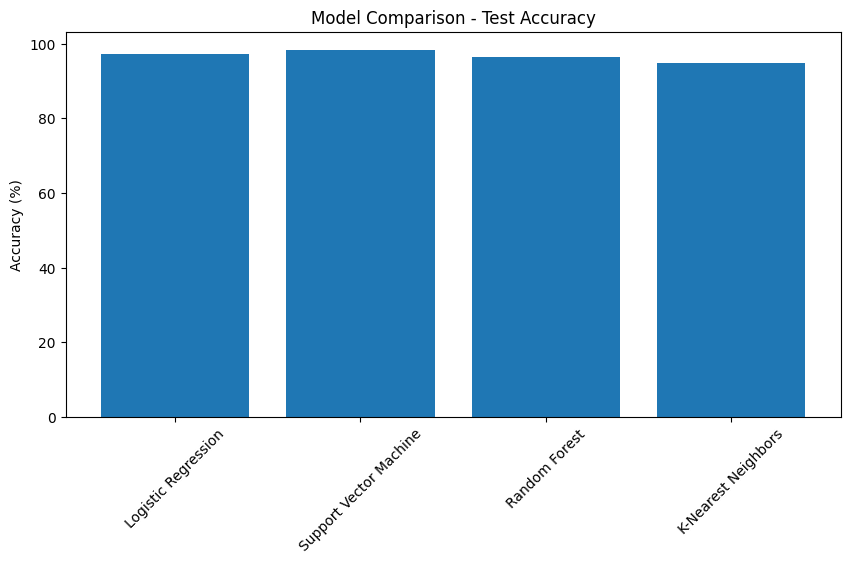

In [39]:
plt.figure(figsize=(10,5))
plt.bar(results["Model"], results["Test Accuracy"])
plt.xticks(rotation=45)
plt.title("Model Comparison - Test Accuracy")
plt.ylabel("Accuracy (%)")
plt.show()


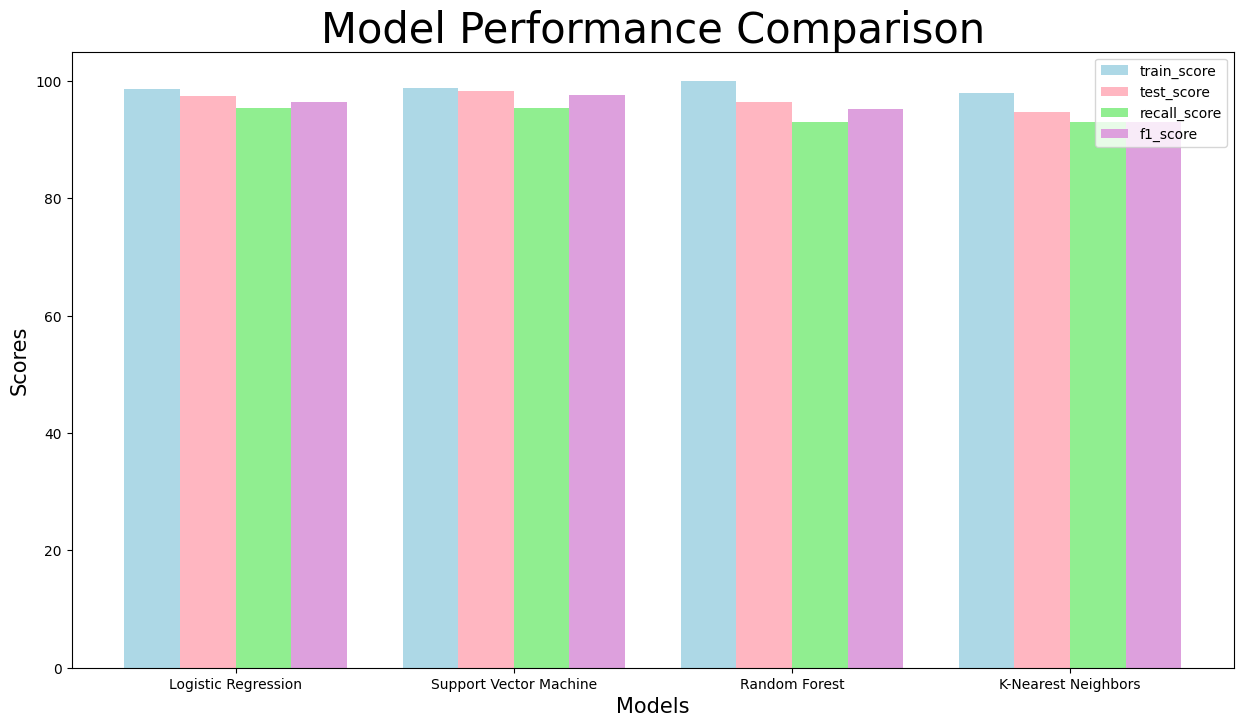

In [40]:
plt.figure(figsize=(15, 8))
bar_width = 0.2
xpos=np.arange(len(model_names))
bars1=plt.bar(xpos - 0.3, train_score, width=bar_width, label="train_score",color='lightblue')
bars2=plt.bar(xpos - 0.1, test_score, width=bar_width, label="test_score",color='lightpink')
bars3=bars=plt.bar(xpos + 0.1, rec_score, width=bar_width, label="recall_score",color='lightgreen')
bars4=plt.bar(xpos + 0.3, f_score, width=bar_width, label="f1_score",color='plum')

plt.xticks(xpos, model_names)
plt.legend()
plt.xlabel("Models",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Model Performance Comparison",fontsize=30)
plt.show()

### Classification Report

In [41]:
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))


SVM Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Confusion Matrix

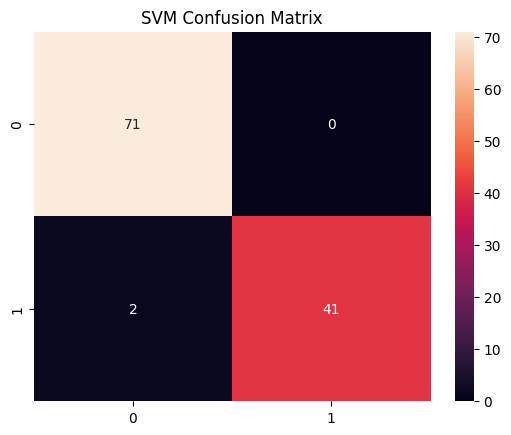

In [42]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("SVM Confusion Matrix")
plt.show()


### Making Predictions

In [43]:
import numpy as np

input_data = np.array([[
    17.990000, 10.380000, 122.800000, 1001.000000, 0.118400, 0.277600, 0.300100, 0.147100, 0.241900, 0.078710, 1.095000, 0.905300, 8.589000, 153.400000, 0.006399, 0.049040, 0.053730, 0.015870, 0.030030,
    0.006193, 25.380000, 17.330000, 184.600000, 2019.000000, 0.162200, 0.665600, 0.711900, 0.265400, 0.460100, 0.118900
]])

prediction = svm.predict(input_data.reshape(1, -1))

print(prediction)

[1]


### Saving the model and the standard scaler

In [44]:
import pickle

with open("svm.pkl", "wb") as file:
    pickle.dump(svm, file)


In [45]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)


In [46]:
from google.colab import files
files.download('svm.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>